In [1]:
from pathlib import Path
import pandas as pd
import gc
import bz2
from sklearn.preprocessing import LabelEncoder
import pickle
import numpy as np
import os

In [2]:
data = './data'

In [3]:
def read_bz(name):
    f =  bz2.open(os.path.join(data, name), 'rb')
    res = pickle.load(f).drop(['id_doc', 'id_card'], axis='columns')
    f.close()
    return res

In [4]:
df = read_bz('11_prepared.pkl.bz2')
df

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-11-01 15:29:01,0,52,271,1.0,107.98,False,332351,3121751
1,2020-11-01 12:41:10,8293317,52,-9999,1.0,108.00,False,1875438,22047017
2,2020-11-01 13:17:09,0,61,379,2.0,112.00,False,563112,6419825
3,2020-11-01 12:31:31,0,61,379,1.0,55.91,False,1841710,10284541
4,2020-11-01 13:06:15,0,61,271,2.0,87.80,False,1304277,10424967
...,...,...,...,...,...,...,...,...,...
46496617,2020-11-30 15:05:50,0,21420,12831,1.0,81.00,False,1423663,13726324
46496618,2020-11-30 13:49:02,0,22397,12657,1.0,76.00,False,406658,17134146
46496619,2020-11-30 14:44:37,0,22932,13532,1.0,34.00,False,1319934,3130473
46496620,2020-11-30 15:52:27,0,23954,12831,1.0,152.00,False,897152,10045346


visualization

In [5]:
df.head()

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-11-01 15:29:01,0,52,271,1.0,107.98,False,332351,3121751
1,2020-11-01 12:41:10,8293317,52,-9999,1.0,108.00,False,1875438,22047017
2,2020-11-01 13:17:09,0,61,379,2.0,112.00,False,563112,6419825
3,2020-11-01 12:31:31,0,61,379,1.0,55.91,False,1841710,10284541
4,2020-11-01 13:06:15,0,61,271,2.0,87.80,False,1304277,10424967


In [6]:
df.describe()

,id_order,id_tov,id_kontr,quantity,sum,id_card_int,id_doc_int
count,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07,4.649662e+07
mean,1.920266e+06,1.800935e+04,1.027675e+04,1.381354e+00,1.195184e+02,8.543480e+05,1.170871e+07
std,3.755327e+06,1.144678e+04,9.587859e+03,2.943611e+01,1.144673e+02,5.464054e+05,6.761143e+06
min,0.000000e+00,4.600000e+01,-9.999000e+03,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
25%,0.000000e+00,1.452600e+04,3.760000e+02,1.000000e+00,5.200000e+01,3.681530e+05,5.853453e+06
50%,0.000000e+00,1.973000e+04,1.367500e+04,1.000000e+00,9.200000e+01,8.223610e+05,1.170893e+07
75%,0.000000e+00,2.489200e+04,1.662800e+04,1.000000e+00,1.530000e+02,1.303188e+06,1.756278e+07
max,1.020057e+07,4.075900e+04,2.265700e+04,5.000000e+03,1.478400e+04,1.944074e+06,2.341787e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46496621 entries, 0 to 46496621
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   id_order     int64         
 2   id_tov       int64         
 3   id_kontr     int64         
 4   quantity     float64       
 5   sum          float64       
 6   is_green     bool          
 7   id_card_int  int64         
 8   id_doc_int   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5)
memory usage: 3.2 GB


In [8]:
df.isna().sum()

date           0
id_order       0
id_tov         0
id_kontr       0
quantity       0
sum            0
is_green       0
id_card_int    0
id_doc_int     0
dtype: int64

In [9]:
df.is_green.value_counts()

False    42764237
True      3732384
Name: is_green, dtype: int64

<AxesSubplot:ylabel='Frequency'>

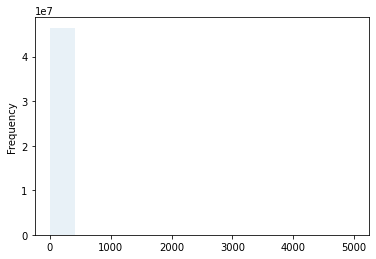

In [10]:
df.quantity.plot.hist(bins=12, alpha=0.1)

### Rich clients

In [11]:
summed_df = df.groupby('id_card_int', as_index=False).sum().sort_values('sum', ascending=False)

In [12]:
summed_df.head()

,id_card_int,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
634961,883386,0,5225384146,2691594122,278316.997,22018356.77,575,2676528719357
1105409,1577248,1525064094,18136479,14771200,4798.307,1279932.55,0,10345626259
734805,1028081,0,1591032,1283206,470.498,117739.34,0,688135777
264302,356029,4432157449,11999668,7307748,931.651,116052.43,1,4462900685
429674,588107,225732765,7016365,5664784,960.697,112809.07,0,3212837081


In [13]:
summed_df.id_card_int

634961      883386
1105409    1577248
734805     1028081
264302      356029
429674      588107
            ...   
1157886    1658568
1246924    1801318
1331880    1940595
1171947    1680218
428257      586087
Name: id_card_int, Length: 1335358, dtype: int64

In [14]:
summed_df['sum'].describe()

count    1.335358e+06
mean     4.161582e+03
std      1.998368e+04
min      0.000000e+00
25%      6.440000e+02
50%      1.868585e+03
75%      5.137095e+03
max      2.201836e+07
Name: sum, dtype: float64

In [15]:
std, mean = summed_df['sum'].std(), summed_df['sum'].mean()
thresh = mean + std * 5.30
thresh

110075.06222611859

In [16]:
bad_clients = summed_df[summed_df['sum'] > thresh]['id_card_int'].values.tolist()
print(bad_clients)

[883386, 1577248, 1028081, 356029, 588107]


### wrong quantity num

In [17]:
zero_quantity = df[df['quantity'] <= 0].groupby('id_card_int').count().sort_values('id_doc_int')
zero_quantity

,date,id_order,id_tov,id_kontr,quantity,sum,is_green,id_doc_int
id_card_int,,,,,,,,
22599,1,1,1,1,1,1,1,1
527308,1,1,1,1,1,1,1,1
1010794,1,1,1,1,1,1,1,1
394767,2,2,2,2,2,2,2,2
1272759,2,2,2,2,2,2,2,2


In [18]:
bad_clients += zero_quantity[-1:].index.values.tolist()
print(zero_quantity[-1:].index)

Int64Index([1272759], dtype='int64', name='id_card_int')


### check by count

In [19]:
counted = df.groupby(['id_card_int']).size().reset_index(name="counts").sort_values(by="counts")
counted

,id_card_int,counts
1100156,1569326,1
558437,772791,1
954998,1350833,1
1279817,1855550,1
558430,772781,1
...,...,...
733034,1025552,732
365881,497966,737
1105409,1577248,789
1271558,1841799,790


get the biggest client

In [20]:
bad_clients += [counted.iloc[-1]['id_card_int']]

### Writing result

In [21]:
ouliers = pd.DataFrame.from_dict({'id_card': bad_clients})

with bz2.open(os.path.join(data, 'rinat.pkl.bz2'), 'wb') as f:
    pickle.dump(ouliers, f, protocol=4)
